In [1]:
!pip install arch

  Using cached arch-7.1.0-cp313-cp313-win_amd64.whl.metadata (13 kB)
  Using cached numpy-2.1.2-cp313-cp313-win_amd64.whl.metadata (59 kB)
  Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached arch-7.1.0-cp313-cp313-win_amd64.whl (923 kB)
Using cached numpy-2.1.2-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached scipy-1.14.1-cp313-cp313-win_amd64.whl (44.5 MB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2

In [2]:
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp313-cp313-win_amd64.whl.metadata (167 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp313-cp313-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp313-cp313-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.7-cp313-cp313-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [3]:
import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt

# Impor Data

In [548]:
data = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\5 data\\2023-2024-fixed.csv")
dt = data[[
    'date.range',
    'passenger'
]]
dt.head()

,date.range,passenger
0,2023-01-01,10293.0
1,2023-01-02,12020.0
2,2023-01-03,12659.0
3,2023-01-04,13126.0
4,2023-01-05,13327.0


In [549]:
dt.tail()

,date.range,passenger
634,2024-09-26,14369.0
635,2024-09-27,16692.0
636,2024-09-28,14536.0
637,2024-09-29,15680.0
638,2024-09-30,15480.0


In [550]:
dt.shape

(639, 2)

# Splitting Data

_Splitting_ data dilakukan dengan membagi data menjadi data latih dan data uji


Jumlah data latih: 578
Jumlah data uji: 61


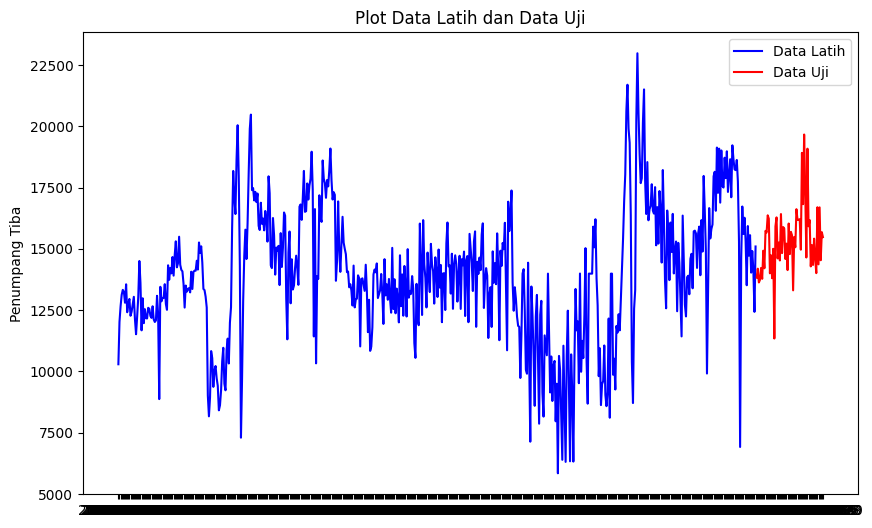

In [553]:
train_data = dt.iloc[:578]
test_data = dt.iloc[578:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['date.range'], train_data['passenger'], label='Data Latih', color='blue')
plt.plot(test_data['date.range'], test_data['passenger'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Penumpang Tiba')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Plot Data Differencing')

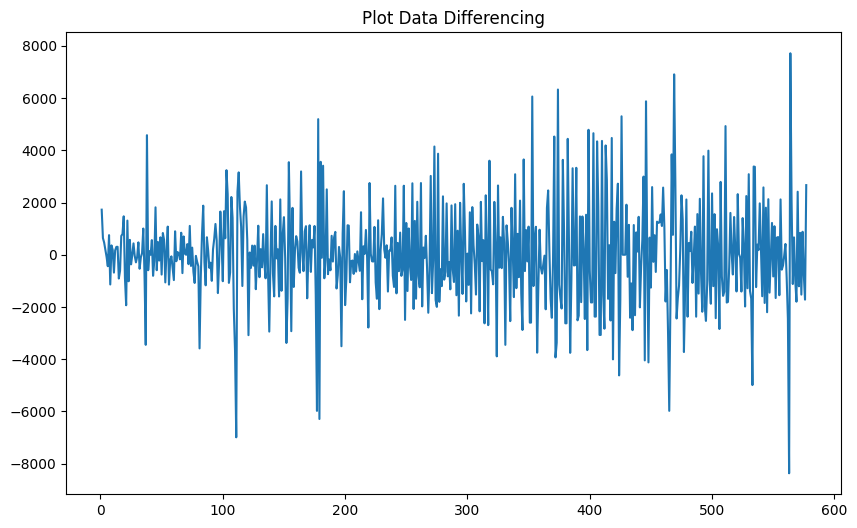

In [603]:
#differencing weekly
train_data_diff1 = train_data['passenger'].diff(1).dropna()


## Menampilkan data hasil differencing
plt.figure(figsize=(10, 6))
plt.plot(train_data_diff1)
plt.title('Plot Data Differencing')

# Pemodelan GARCH

Load Data

In [604]:
model_garch11_diff = arch_model(train_data_diff1, vol='GARCH', mean = 'constant', p=1, q=1)

In [605]:
result_garch11 = model_garch11_diff.fit(disp='off')
print(result_garch11.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              passenger   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5148.34
Distribution:                  Normal   AIC:                           10304.7
Method:            Maximum Likelihood   BIC:                           10322.1
                                        No. Observations:                  577
Date:                Wed, Oct 30 2024   Df Residuals:                      576
Time:                        13:00:46   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            54.0313     52.754      1.024      0.306 [-49.366,

d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.843e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


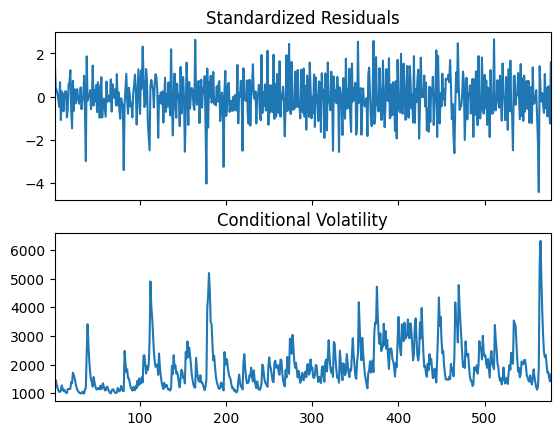

In [606]:
fig = result_garch11.plot()

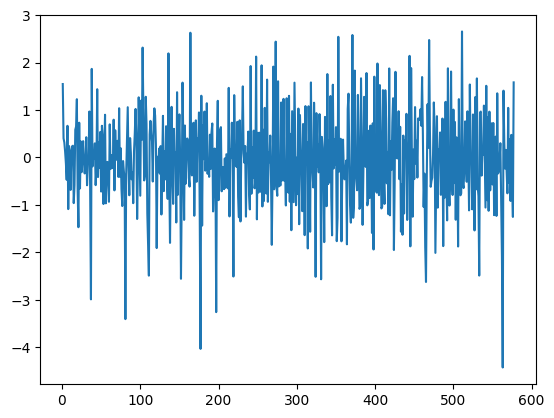

In [607]:
garch_stresidual = result_garch11.resid / result_garch11.conditional_volatility
plt.plot(garch_stresidual)

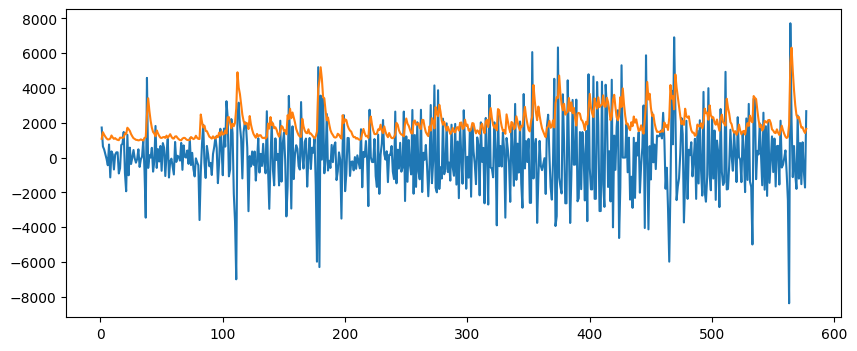

In [608]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data_diff1)
preds, = plt.plot(result_garch11.conditional_volatility)

In [609]:
np.random.seed(31)
epsilon_train = np.random.normal(0, 1, len(train_data_diff1))

In [610]:
epsilon_train

array([-0.41475721, -0.33336867,  0.08109199, -0.79102695, -0.21859967,
       -0.76319684, -0.77712024,  1.84935652, -0.70560031, -0.08604203,
        0.2879333 , -0.13138652, -0.98274415, -0.91879129,  1.19943449,
       -0.34137424, -1.75860731,  0.05111747, -0.57192899, -0.70056604,
       -0.93510624,  1.534486  ,  1.97743404, -0.43512633, -0.1345519 ,
       -0.20956474, -0.76685015,  0.03997044,  0.61177797, -0.26382531,
        0.51727975,  0.68670636,  1.10045586, -0.09211156, -0.41666901,
       -0.21981794, -0.01775561, -1.19035206, -1.08558741, -1.07493565,
        0.01438565, -0.08918021, -0.6752365 ,  1.58962542, -0.44748843,
       -0.52061822, -0.69362668,  1.2687288 ,  1.40042357, -0.62292862,
        0.38658363,  0.56903379, -1.42666364, -1.83088501, -1.55463868,
        2.41304202,  0.23029874,  0.25721427, -0.21768359, -0.51702352,
        1.8132576 , -0.8947488 ,  0.26417724,  2.29036693, -0.37870628,
       -0.12115923, -0.36886211, -1.21474186, -0.23624057,  1.26

In [611]:
predicted_train = (result_garch11.conditional_volatility)  * epsilon_train

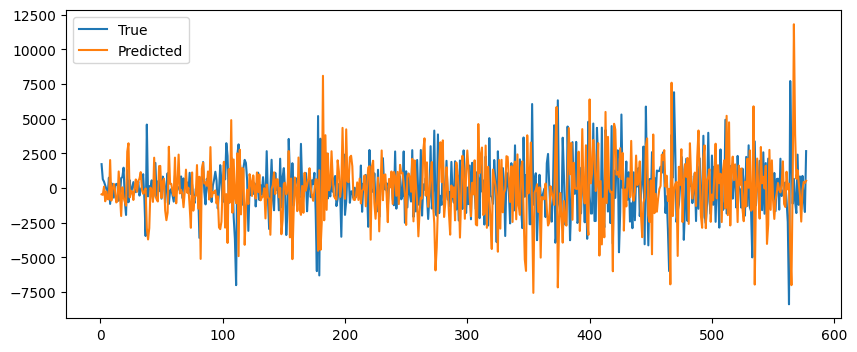

In [612]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data_diff1)
preds, = plt.plot(predicted_train)
plt.legend(['True', 'Predicted'])

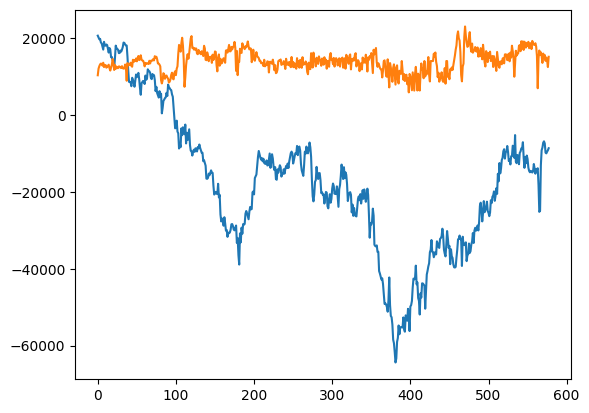

In [626]:
x, x_diff = train_data['passenger'].iloc[0], predicted_train
predicted_train_inv = (np.r_[x, x_diff].cumsum().astype(int)) + x
plt.plot(predicted_train_inv )
plt.plot(train_data['passenger'])

In [624]:
mape(train_data['passenger'], predicted_train_inv)

np.float64(144.08947369140742)

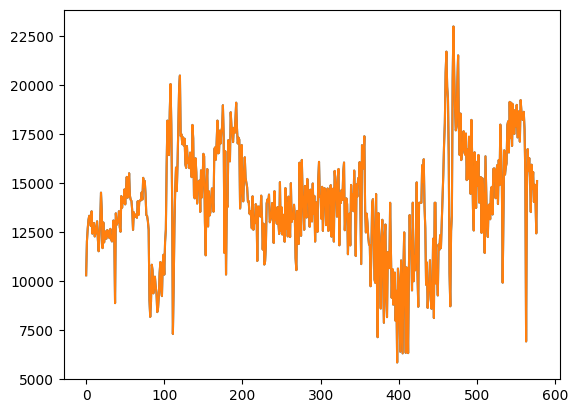

In [620]:
x, x_diff = train_data['passenger'].iloc[0], train_data_diff1
train_data_inv = np.r_[x, x_diff].cumsum().astype(int)

plt.plot(train_data_inv)
plt.plot(train_data['passenger'])

Uji Sisaan

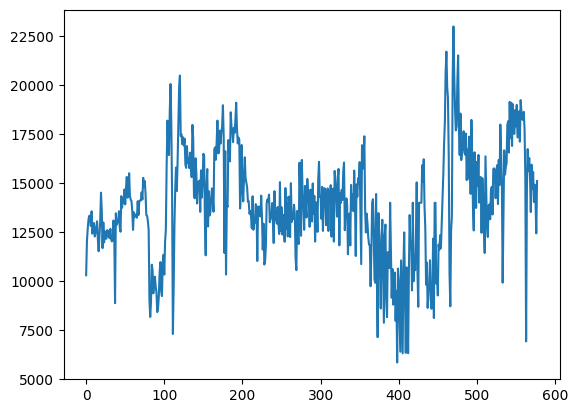

In [602]:
garch_stresidual = result_garch11.resid 
plt.plot(garch_stresidual)

In [595]:
!pip install statsmodels

^C


In [614]:
import statsmodels.api as sm
result_df = sm.stats.acorr_ljungbox(abs(garch_stresidual), return_df=True)
print(result_df)

      lb_stat  lb_pvalue
1    0.908757   0.340444
2    1.176770   0.555223
3    3.487150   0.322432
4    4.696782   0.319847
5    6.862159   0.231095
6    6.927520   0.327602
7   17.342240   0.015318
8   17.435665   0.025879
9   20.943823   0.012902
10  21.063693   0.020654


In [569]:
!pip install scipy

^C


In [615]:
from scipy import stats
result_norm = stats.kstest(garch_stresidual, 'norm')
print(result_norm.pvalue)

0.19686053698018213


In [598]:
result_harapan = stats.ttest_1samp(garch_stresidual, 0)
print(result_harapan.pvalue)

0.0


In [543]:
!pip install pmdarima

  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl.metadata (3.2 kB)
  Using cached urllib3-2.2.3-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
Using cached Cython-3.0.11-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached setuptools-75.3.0-py3-none-any.whl (1.3 MB)
Using cached urllib3-2.2.3-py3-none-any.whl (126 kB)
Failed to build pmdarima


  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call last):
        File "d:\IPB\5\MPDW\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "d:\IPB\5\MPDW\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^

In [579]:
## rbind passenger[0] dan predicted_train
#predicted_train_result = pm.utils.diff_inv(predicted_train, differences=1, xi=train_data['passenger'][0])
predicted_train_result = np.r_[train_data['passenger'][0], predicted_train].cumsum().astype(int)
predicted_train_result.shape

(578,)

<function matplotlib.pyplot.show(close=None, block=None)>

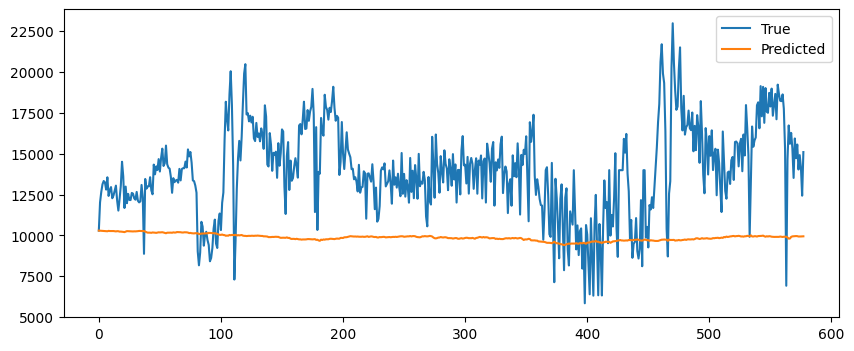

In [580]:
plt.figure(figsize=(10,4))
true, = plt.plot(train_data['passenger'])
preds, = plt.plot(predicted_train_result)
plt.legend(['True', 'Predicted'])
plt.show

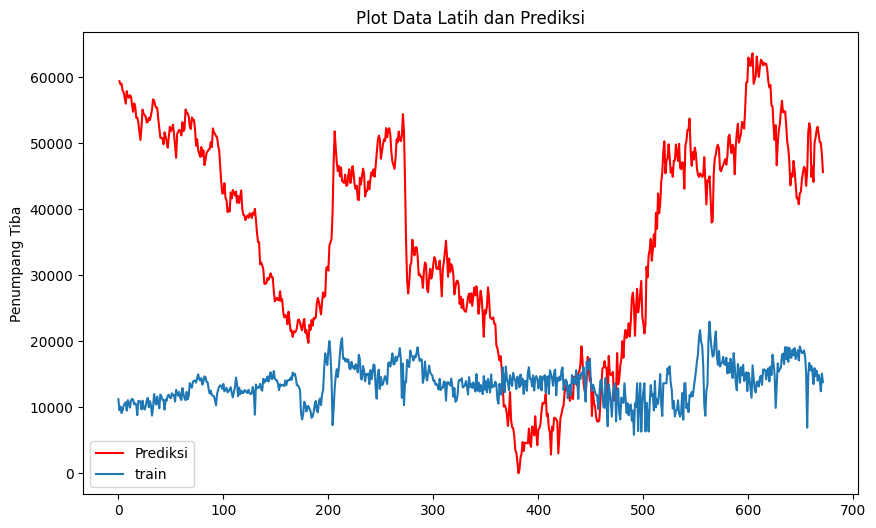

In [522]:
## plot data train dan hasil predicted train
plt.figure(figsize=(10, 6))
plt.plot(predicted_train_result - min(predicted_train_result) + 1, label='Prediksi', color='red')
plt.plot(train_data['passenger'],label="train")
plt.title('Plot Data Latih dan Prediksi')
plt.ylabel('Penumpang Tiba')
plt.legend()
plt.show()

In [392]:
# calculate MAPE
def mape(actual, pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100

mape(train_data['passenger'], predicted_train_result)

np.float64(268.8045127973407)

In [147]:
#predicted_train.to_csv("D:\\IPB\\5\\MPDW\\project\\2 garch try\\convolp2q2_new.csv", index=False)

<Axes: >

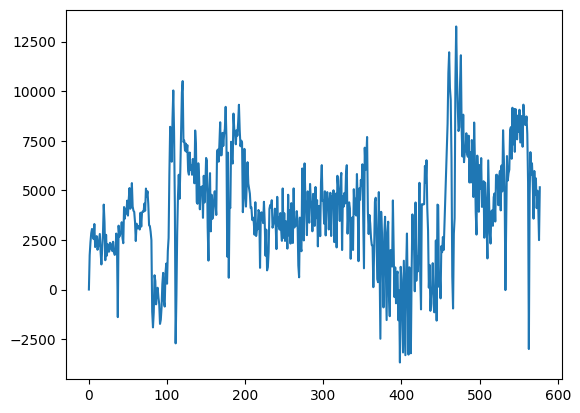

In [627]:
sisaan = train_data['passenger'] - predicted_train_result
sisaan.plot()

In [628]:
sisaan.to_csv("D:\\IPB\\5\\MPDW\\project\\7 garch-lstm\\sisaan.csv", index=False)

In [629]:
sisaan

0         0.0
1      1732.0
2      2377.0
3      2843.0
4      3054.0
        ...  
573    4100.0
574    4981.0
575    4216.0
576    2492.0
577    5154.0
Name: passenger, Length: 578, dtype: float64

In [649]:
et_lstm_train = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\7 garch-lstm\\predicted_et_train.csv")
et_lstm_train.head()

,Unnamed: 0,0
0,0,1121.1803
1,1,2248.2498
2,2,2700.4146
3,3,3036.8936
4,4,3191.7847


In [650]:
et_lstm_train_hasil = np.r_[[0,0,0,0], et_lstm_train['0']]

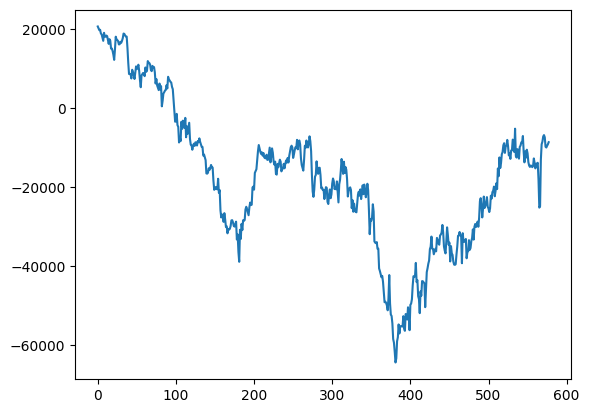

In [652]:
plt.plot(predicted_train_inv)

In [647]:
predicted_train_inv

array([ 20586.,  20137.,  19650.,  19757.,  18809.,  18568.,  17773.,
        16960.,  18983.,  18086.,  17987.,  18296.,  18149.,  17116.,
        16180.,  17380.,  16989.,  14979.,  15038.,  14376.,  13406.,
        12143.,  14776.,  18006.,  17339.,  17157.,  16901.,  16047.,
        16090.,  16715.,  16448.,  16959.,  17649.,  18800.,  18707.,
        18298.,  18049.,  18028.,  15140.,  11442.,   8564.,   8595.,
         8442.,   7449.,   9642.,   9093.,   8281.,   7316.,   8901.,
        10499.,   9798.,  10249.,  10921.,   9306.,   6996.,   5224.,
         8207.,   8517.,   8825.,   8586.,   8020.,  10219.,   9124.,
         9423.,  11837.,  11455.,  11335.,  10933.,   9558.,   9292.,
        10622.,  10290.,  10318.,   9020.,   6160.,   7290.,   5666.,
         5041.,   4492.,   6153.,   4678.,   5495.,    394.,   1795.,
         3625.,   3956.,   4367.,   4533.,   5734.,   4912.,   7869.,
         7227.,   6942.,   6586.,   6420.,   5316.,   4721.,   1889.,
        -1069.,  -34

<Axes: >

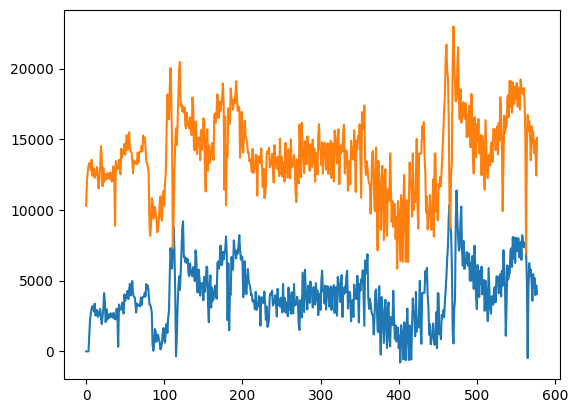

In [654]:
hybrid_train = et_lstm_train_hasil 
plt.plot(hybrid_train)
train_data['passenger'].plot()

In [414]:
mape(train_data['passenger'],hybrid_train)

np.float64(6.6600678163444424)

In [396]:
pd.DataFrame(sisaan).to_csv("D:\\IPB\\5\\MPDW\\project\\7 garch-lstm\\sisaan.csv", index=False)

In [397]:
condvar_test = []
test_size = 60
for i in range(test_size):
    train = train_data_diff1[:-(test_size-i)]
    model = arch_model(train, p=1, q=1  ,mean='constant', vol='GARCH', dist='normal')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    condvar_test.append(np.sqrt(pred.variance.values[-1,:][0]))

d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.512e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.506e+06. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.01 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
d:\IPB\5\MPDW\.venv\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

<Axes: >

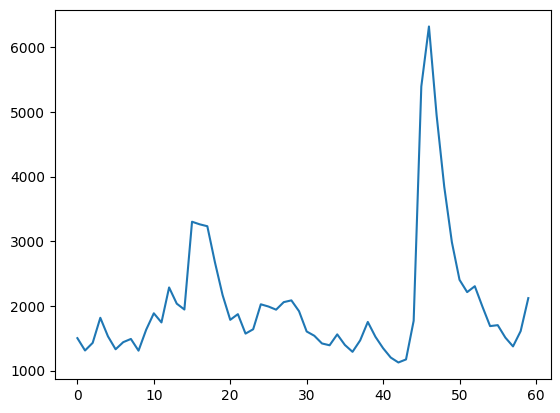

In [400]:
condvar_test_result = pd.DataFrame(condvar_test, columns=['condvar_test'])
condvar_test_result
condvar_test_result['condvar_test'].plot()

In [401]:
epsilon_test = np.random.normal(0, 1, test_size)

In [431]:
train_data['passenger'].iloc[-1] 

np.int64(13823)

<Axes: >

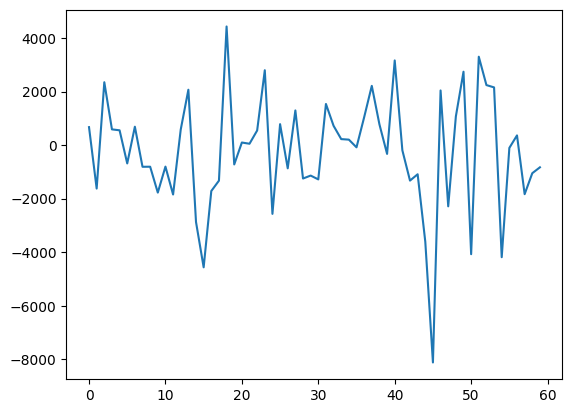

In [434]:
condvar_test_result["epsilon_test"] = epsilon_test * condvar_test_result['condvar_test']
condvar_test_result["epsilon_test"].plot() 

In [437]:
condvar_test_result_inv = np.concatenate([[train_data['passenger'].iloc[-1]], condvar_test_result["epsilon_test"]])
condvar_test_result_inv = np.cumsum(condvar_test_result_inv)

In [444]:
condvar_test_result_inv = pd.Series(condvar_test_result_inv[1:], index=test_data.index)
condvar_test_result_inv

672             NaN
673    12869.232235
674    15215.920429
675    15802.409912
676    16354.161959
677    15668.521397
678    16354.961546
679    15544.494236
680    14736.780457
681    12962.820939
682    12159.031680
683    10313.473442
684    10892.442339
685    12958.926629
686    10086.176757
687     5522.161304
688     3806.711905
689     2478.151299
690     6906.454023
691     6183.070978
692     6278.601898
693     6328.641684
694     6873.576069
695     9668.277580
696     7099.874263
697     7881.113718
698     7013.399223
699     8307.017752
700     7058.201348
701     5919.554847
702     4638.297623
703     6173.601334
704     6892.891385
705     7116.009615
706     7319.308079
707     7235.784962
708     8274.371703
709    10485.737793
710    11259.036766
711    10930.447965
712    14090.893167
713    13895.994396
714    12570.026015
715    11480.455992
716     7871.456975
717     -245.470174
718     1794.240649
719     -492.819044
720      576.624294
721     3315.929177


In [415]:
et_lstm_test = pd.read_csv("D:\\IPB\\5\\MPDW\\project\\7 garch-lstm\\predicted_et_test.csv")
et_lstm_test.head()

,Unnamed: 0,0
0,0,29504.068
1,1,29089.264
2,2,28662.467
3,3,28223.703
4,4,27773.074


In [ ]:
condvar

<Axes: >

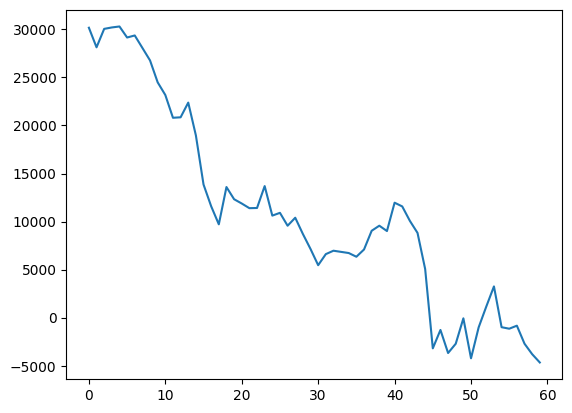

In [450]:

hybrid_test = et_lstm_test['0'] + np.cumsum(condvar_test_result["epsilon_test"])
hybrid_test.plot()

<Axes: >

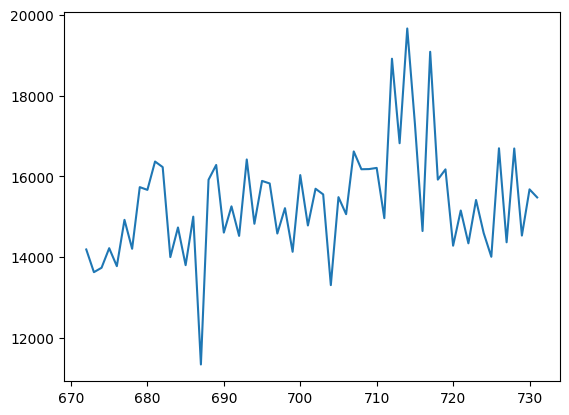

In [423]:
test_data['passenger'].plot()

In [422]:
np.mean(np.abs((test_data['passenger'] - hybrid_test) / test_data['passenger'])) * 100

nan

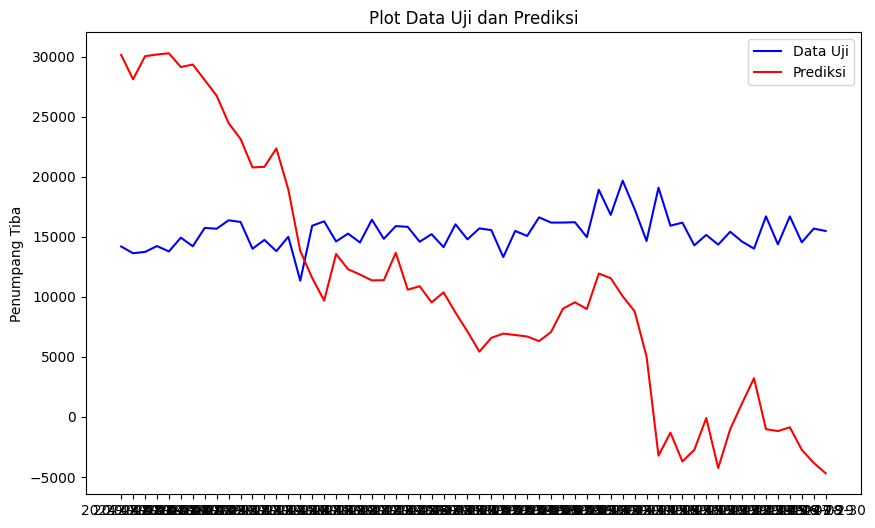

In [427]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['tanggal'], test_data['passenger'], label='Data Uji', color='blue')
plt.plot(test_data['tanggal'], hybrid_test, label='Prediksi', color='red')
plt.title('Plot Data Uji dan Prediksi')
plt.ylabel('Penumpang Tiba')
plt.legend()
plt.show()